# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

## Inicialização

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

## Carregar dados

In [2]:
# Carreguando arquivos
df_calls = pd.read_csv('megaline_calls.csv')

In [3]:
df_internet = pd.read_csv('megaline_internet.csv')

In [4]:
df_msg = pd.read_csv('megaline_messages.csv')

In [5]:
df_plans = pd.read_csv('megaline_plans.csv')

In [6]:
df_users = pd.read_csv('megaline_users.csv')

## Preparar os dados

In [7]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [8]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [9]:
df_msg

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [10]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [12]:
nomes_dataframes = [df_calls, df_internet, df_msg, df_plans, df_users]

# Loop para verificar cada DataFrame
for idx, df in enumerate(nomes_dataframes):
    print(f"Verificando df{idx+1}:")

    # Verificando as primeiras linhas do DataFrame
    print(df.head())

    # Obtendo informações sobre o DataFrame
    print(df.info())

    # Verificando se há valores nulos em cada coluna
    print(df.isnull().sum())

    # Verificando se há linhas duplicadas no DataFrame
    print(df.duplicated().sum())

    # Exibindo estatísticas descritivas das colunas numéricas
    print(df.describe())

    print("----")  # Separador entre os DataFrames
    print("----")
    print("----")

Verificando df1:
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
id           0
user_id      0
call_date    0
duration     0
dtype: int64
0
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      12

## Planos

In [13]:
# Informaçãoes gerais do DF

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
# Imprimindo uma amostra

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Tudo certo aqui

### Corrigir dados

In [15]:
# Renomeando a coluna plan_name
df_plans.rename(columns={'plan_name': 'plan'},inplace=True)

## Usuários

In [16]:
# Vizualizando algumas informações
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [17]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
# Verificando valores nulos
df_users[df_users['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [19]:
# Vizualizando quantas pessoas tem cada plano
df_users.groupby('plan')['churn_date'].apply(lambda x: x.isnull().sum())

plan
surf        316
ultimate    150
Name: churn_date, dtype: int64

In [20]:
# Vizualiando a porcetagem de pessoas 
df_users[df_users['churn_date'].isnull()].groupby('plan').size() / df_users['churn_date'].isnull().sum() * 100

plan
surf        67.811159
ultimate    32.188841
dtype: float64

In [21]:
# Vizualiando a contagem de cada plano
df_users['plan'].value_counts()

plan
surf        339
ultimate    161
Name: count, dtype: int64

In [22]:
# Vizualizando a porcentagem ed cada plano
df_users['plan'].value_counts(normalize=True) * 100

plan
surf        67.8
ultimate    32.2
Name: proportion, dtype: float64

In [23]:
# Imprimir uma amostra de dados para usuários
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [24]:
# Vizualizando se há presença de duplicadas
df_users.duplicated().sum()

0

In [25]:
# Removendo valores nulos
df_users.dropna()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


In [26]:
df_users['churn'] = df_users['churn_date'].notnull().astype(int)

# Verificar o resultado
print(df_users)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

In [27]:
# Substituindo os valroes nulos na coluna por 0
#df_users['churn_date'].fillna(0, inplace=True)

In [28]:
# Conferindo se funcionou
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0


### Corrigir dados

In [29]:
# Transformando o tipo da coluna pro formato DateTime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0


In [30]:
# Vizualizando as informações gerais do DF
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
 8   churn       500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 33.3+ KB


## Chamadas

In [31]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [32]:
# Imprimir uma amostra de dados para chamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Corrigir dados

In [33]:
# Transformando a coluna pra DateTime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Mensagens

In [34]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
# Imprima uma amostra dos dados para as mensagens

df_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corrigir dados

In [36]:
# Transformando a coluna pra DateTime
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'])
df_msg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [37]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [38]:
# Imprime uma amostra de dados para o tráfego da Internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corrigir dados

In [39]:
# Transformando a coluna pra DateTime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


## Condições do plano de estudos

In [40]:
# Imprime as condições do plano e certifique-se de que estão claras para você
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Dados agregados por usuário



In [41]:
# Vizualizando o DF
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0


In [42]:
# Vizualizando as calls
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [43]:
# Criando uma coluna com a contagem de meses
df_calls['month'] = df_calls['call_date'].dt.month
df_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [44]:
# Criando um DF com os mses para cada mês de ligação afetuada por pessoa
df_calls_per_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='count')
df_calls_per_month

,user_id,month,count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [45]:
# Verificando se há valores nulos
df_calls_per_month.isna().sum()

user_id    0
month      0
count      0
dtype: int64

In [46]:
# Mesclando alguns DF
df_users = df_users.merge(df_calls_per_month, on='user_id', how='outer', suffixes=('_users', '_calls'))

In [47]:
# Substituindo valores nulos por 0
df_users['month'] = df_users['month'].fillna(0).astype(int)
df_users['count'] = df_users['count'].fillna(0).astype(int)

In [48]:
# Verificando informações
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2277 non-null   int64         
 1   first_name  2277 non-null   object        
 2   last_name   2277 non-null   object        
 3   age         2277 non-null   int64         
 4   city        2277 non-null   object        
 5   reg_date    2277 non-null   datetime64[ns]
 6   plan        2277 non-null   object        
 7   churn_date  160 non-null    object        
 8   churn       2277 non-null   int32         
 9   month       2277 non-null   int32         
 10  count       2277 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(5)
memory usage: 169.1+ KB


In [49]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,count
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0,12,16
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,8,27
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,9,49
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,10,65
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,11,64
...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0,12,39
2273,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0,9,41
2274,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0,10,53
2275,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0,11,45


In [50]:
# Criando um novo DF com groupby
df_duration_per_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
df_duration_per_month['duration'] = df_duration_per_month['duration'].apply(lambda x: math.ceil(x))


In [51]:
# Juntando os DFs
df_users = df_users.merge(df_duration_per_month, on=['user_id', 'month'], how='outer')


In [52]:
# Verificando se deu certo
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,count,duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0,12,16,117.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,8,27,172.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,9,49,298.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,10,65,375.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0,11,64,405.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0,12,39,325.0
2273,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0,9,41,331.0
2274,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0,10,53,364.0
2275,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0,11,45,289.0


In [53]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

df_msg

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [54]:
# Confirmando que a coluna está em DateTime
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'])

In [55]:
# Pegando a contagem de meses da coluna
df_msg['month'] = df_msg['message_date'].dt.month

In [56]:
# 
df_msg_count_per_month = df_msg.groupby(['user_id', 'month']).size().reset_index(name='msg_count')

In [57]:
df_users = df_users.merge(df_msg_count_per_month, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')


In [58]:
df_users['msg_count'].fillna(0,inplace=True)

In [59]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,count,duration,msg_count
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,16.0,117.0,11.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,27.0,172.0,30.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,49.0,298.0,44.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,65.0,375.0,53.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,64.0,405.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,10,NaN,NaN,76.0
2306,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,11,NaN,NaN,72.0
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,NaN,NaN,61.0
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,5,NaN,NaN,2.0


In [60]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [61]:
df_internet['month'] = df_internet['session_date'].dt.month


In [62]:
df_internet_usage_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()


In [63]:
df_internet_usage_per_month['mb_used'] = np.ceil(df_internet_usage_per_month['mb_used'] / 1024)


In [64]:
df_users = df_users.merge(df_internet_usage_per_month, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')


In [65]:
df_users['mb_used'].fillna(0,inplace=True)

In [66]:
df_users.rename(columns={'mb_used': 'gb_usage'}, inplace=True)

In [67]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,count,duration,msg_count,gb_usage
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,16.0,117.0,11.0,2.0
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,27.0,172.0,30.0,7.0
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,49.0,298.0,44.0,14.0
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,65.0,375.0,53.0,22.0
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,64.0,405.0,36.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,NaN,NaN,61.0,13.0
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,5,NaN,NaN,2.0,2.0
2309,1482,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,10,NaN,NaN,2.0,0.0
2310,1108,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,NaN,NaN,NaN,1.0


In [68]:
# Adicione as informações do plano
df_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [69]:
df_merged = df_users.merge(df_plans, on='plan', how='left')

In [70]:
df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,...,duration,msg_count,gb_usage,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,...,117.0,11.0,2.0,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,...,172.0,30.0,7.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,...,298.0,44.0,14.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,...,375.0,53.0,22.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,...,405.0,36.0,19.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,...,NaN,61.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,5,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2309,1482,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,10,...,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2310,1108,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [72]:
def calculate_payment(row):
    minutes_extra = max(row['duration'] - row['minutes_included'], 0)
    gb_extra = max(row['gb_usage'] - row['mb_per_month_included'] / 1024, 0)
    messages_extra = max(row['msg_count'] - row['messages_included'], 0)
    
    if row['plan'] == 'surf':
        usd_per_minute = row['usd_per_minute']
        usd_per_gb = row['usd_per_gb']
        usd_per_message = row['usd_per_message']
        
    elif row['plan'] == 'ultimate':
        usd_per_minute = row['usd_per_minute']
        usd_per_gb = row['usd_per_gb']
        usd_per_message = row['usd_per_message']
        
    else:
        return 0
    
    payment_amount = row['usd_monthly_pay'] + (minutes_extra * usd_per_minute) + (gb_extra * usd_per_gb) + (messages_extra * usd_per_message)
    return payment_amount

df_merged['payment_amount'] = df_merged.apply(calculate_payment, axis=1)

In [73]:
df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,...,msg_count,gb_usage,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,payment_amount
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,...,11.0,2.0,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,...,30.0,7.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,...,44.0,14.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,...,53.0,22.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,...,36.0,19.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,...,61.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,5,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2309,1482,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,10,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2310,1108,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


### Chamadas

In [74]:
df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,...,msg_count,gb_usage,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,payment_amount
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,...,11.0,2.0,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,...,30.0,7.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,...,44.0,14.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,...,53.0,22.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,...,36.0,19.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,1349,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,...,61.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2308,1361,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,5,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2309,1482,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,10,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2310,1108,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


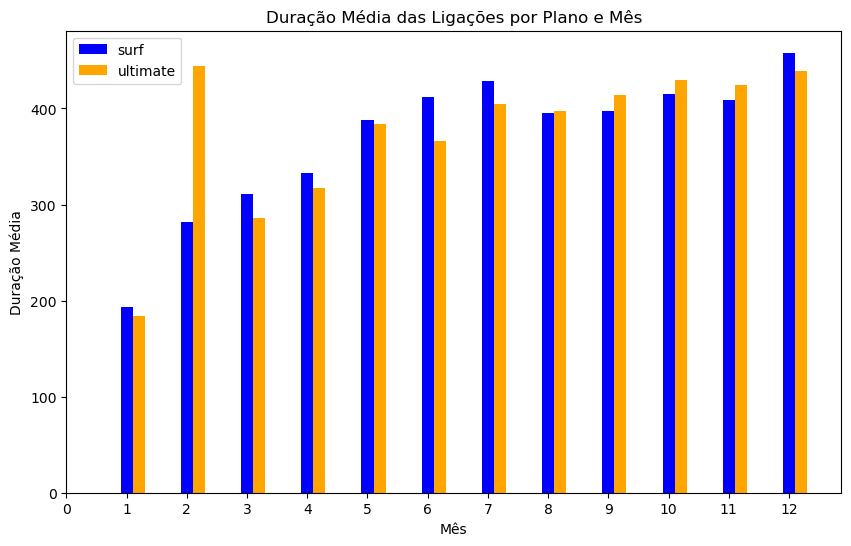

In [75]:
# Agrupar os dados por plano e mês e calcular a média da coluna de duração
grouped_data = df_merged.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Definir as cores para cada plano
colors = {'surf': 'blue', 'ultimate': 'orange'}

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
for i, plan in enumerate(grouped_data['plan'].unique()):
    plt.bar(grouped_data[grouped_data['plan'] == plan]['month'] + i * 0.2, 
            grouped_data[grouped_data['plan'] == plan]['duration'], 
            width=0.2, 
            color=colors[plan],
            label=plan)

plt.xlabel('Mês')
plt.ylabel('Duração Média')
plt.title('Duração Média das Ligações por Plano e Mês')
plt.legend()
plt.xticks(range(len(grouped_data['month'].unique())), grouped_data['month'].unique())
plt.show()

No gráfico acima, observamos que ao longo do ano a média de duração das ligações dos planos é relativamente similar, com exceção do mês 2, onde o plano Ultimate se distancia consideravelmente do plano Surf.

Dito isso, do ponto de vista financeiro, parece mais rentável para a empresa vender planos Surf, pois assim há a possibilidade de ganhar mais dinheiro com o excedente de minutos mensais do plano Surf.

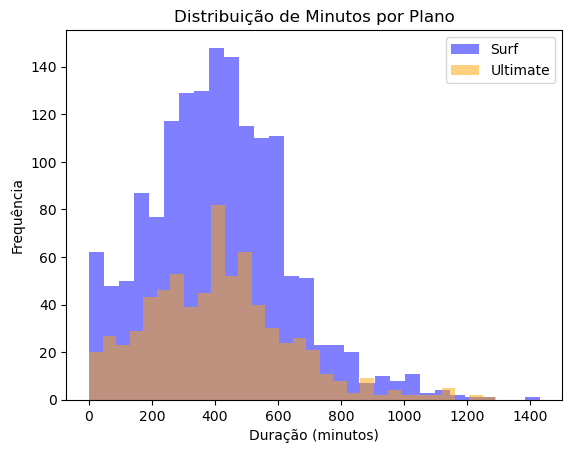

In [76]:
# Filtrar os dados por plano
df_surf = df_merged[df_merged['plan'] == 'surf']
df_ultimate = df_merged[df_merged['plan'] == 'ultimate']

# Criar o histograma para o plano Surf
plt.hist(df_surf['duration'], bins=30, alpha=0.5, label='Surf', color='blue')

# Criar o histograma para o plano Ultimate
plt.hist(df_ultimate['duration'], bins=30, alpha=0.5, label='Ultimate', color='orange')

plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.title('Distribuição de Minutos por Plano')
plt.legend()
plt.show()


No gráfico acima, vemos que a quantidade de minutos gastos no plano Surf é muito maior do que no plano Ultimate. No entanto, isso não necessariamente significa que os usuários do plano Surf usam mais minutos de telefone do que os do plano Ultimate. Essa diferença ocorre devido ao número total de pessoas que possuem o plano Surf ser muito maior em comparação ao plano Ultimate.

In [77]:
# Agrupar os dados por plano
grouped = df_merged.groupby('plan')

# Calcular a média da duração das chamadas por plano
mean_duration = grouped['duration'].mean()

# Calcular a variância da duração das chamadas por plano
var_duration = grouped['duration'].var()

# Imprimir os resultados
print("Média da duração das chamadas:")
print(mean_duration)
print("\nVariância da duração das chamadas:")
print(var_duration)

Média da duração das chamadas:
plan
surf        412.592880
ultimate    410.698457
Name: duration, dtype: float64

Variância da duração das chamadas:
plan
surf        47001.333498
ultimate    50515.469338
Name: duration, dtype: float64


In [78]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2312 non-null   int64         
 1   first_name             2277 non-null   object        
 2   last_name              2277 non-null   object        
 3   age                    2277 non-null   float64       
 4   city                   2277 non-null   object        
 5   reg_date               2277 non-null   datetime64[ns]
 6   plan                   2277 non-null   object        
 7   churn_date             160 non-null    object        
 8   churn                  2277 non-null   float64       
 9   month                  2312 non-null   int32         
 10  count                  2277 non-null   float64       
 11  duration               2258 non-null   float64       
 12  msg_count              2310 non-null   float64       
 13  gb_

In [79]:
df_merged.dropna(subset=['duration'], inplace=True)

In [80]:
df_merged['msg_count']


0       11.0
1       30.0
2       44.0
3       53.0
4       36.0
        ... 
2272     0.0
2273     0.0
2274     0.0
2275     0.0
2276     0.0
Name: msg_count, Length: 2258, dtype: float64

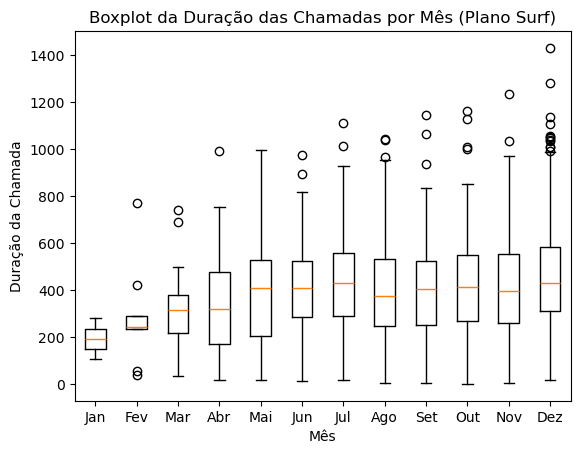

In [81]:
# Filtrar o DataFrame para incluir apenas os dados do plano Surf
df_surf = df_merged[df_merged['plan'] == 'surf']

# Agrupar os dados do plano Surf por mês
grouped_surf = df_surf.groupby('month')

# Criar uma lista vazia para armazenar os dados de duração de cada mês para o plano Surf
duration_data_surf = []

# Iterar sobre cada grupo do plano Surf
for _, group in grouped_surf:
    # Adicionar os dados de duração do grupo à lista
    duration_data_surf.append(group['duration'].tolist())

# Definir os rótulos dos meses
month_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criar o gráfico de boxplot para o plano Surf
plt.boxplot(duration_data_surf, labels=month_labels)

# Definir os rótulos dos eixos
plt.xlabel('Mês')
plt.ylabel('Duração da Chamada')

# Definir o título do gráfico
plt.title('Boxplot da Duração das Chamadas por Mês (Plano Surf)')

# Exibir o gráfico
plt.show()

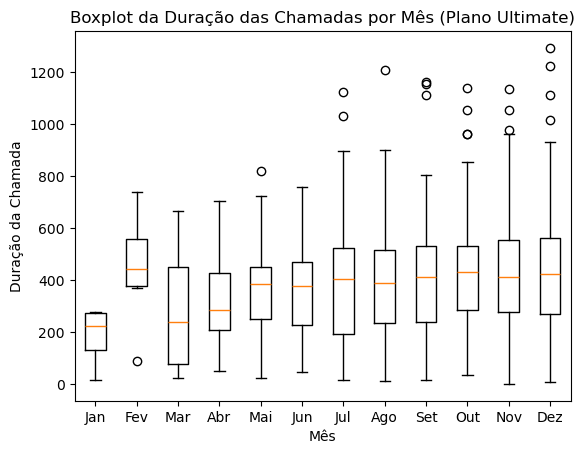

In [82]:
# Filtrar o DataFrame para incluir apenas os dados do plano Ultimate
df_ultimate = df_merged[df_merged['plan'] == 'ultimate']

# Agrupar os dados do plano Ultimate por mês
grouped_ultimate = df_ultimate.groupby('month')

# Criar uma lista vazia para armazenar os dados de duração de cada mês para o plano Ultimate
duration_data_ultimate = []

# Iterar sobre cada grupo do plano Ultimate
for _, group in grouped_ultimate:
    # Adicionar os dados de duração do grupo à lista
    duration_data_ultimate.append(group['duration'].tolist())

# Definir os rótulos dos meses
month_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Criar o gráfico de boxplot para o plano Ultimate
plt.boxplot(duration_data_ultimate, labels=month_labels)

# Definir os rótulos dos eixos
plt.xlabel('Mês')
plt.ylabel('Duração da Chamada')

# Definir o título do gráfico
plt.title('Boxplot da Duração das Chamadas por Mês (Plano Ultimate)')

# Exibir o gráfico
plt.show()

Nos dois gráficos de boxplot, observamos uma semelhança no consumo mensal entre os planos. Além disso, notamos que o plano Ultimate possui menos valores atípicos, o que indica que há menos pessoas nesse plano que consomem minutos em chamadas com duração distante da média.

### Mensagens

In [83]:
df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,...,msg_count,gb_usage,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,payment_amount
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,...,11.0,2.0,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,...,30.0,7.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,...,44.0,14.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,...,53.0,22.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,...,36.0,19.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0.0,12,...,0.0,23.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,100.00
2273,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0.0,9,...,0.0,13.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2274,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0.0,10,...,0.0,20.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,70.00
2275,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0.0,11,...,0.0,17.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,40.00


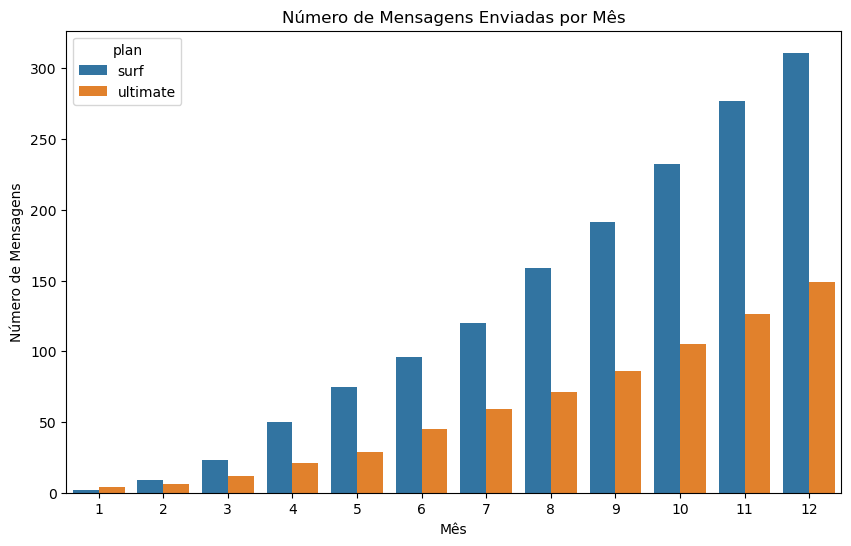

In [84]:
# Agrupar os dados por plano e mês, contando o número de mensagens em cada grupo
messages_data = df_merged.groupby(['plan', 'month'])['msg_count'].count().reset_index()

# Criar um gráfico de barras usando o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=messages_data, x='month', y='msg_count', hue='plan')

# Configurar os rótulos e título do gráfico
plt.xlabel('Mês')
plt.ylabel('Número de Mensagens')
plt.title('Número de Mensagens Enviadas por Mês')

# Exibir o gráfico
plt.show()

No gráfico acima, observamos que o número total de mensagens do plano Surf é superior ao plano Ultimate. Isso é esperado, uma vez que há um número muito maior de pessoas que possuem o plano Surf em comparação com o plano Ultimate.

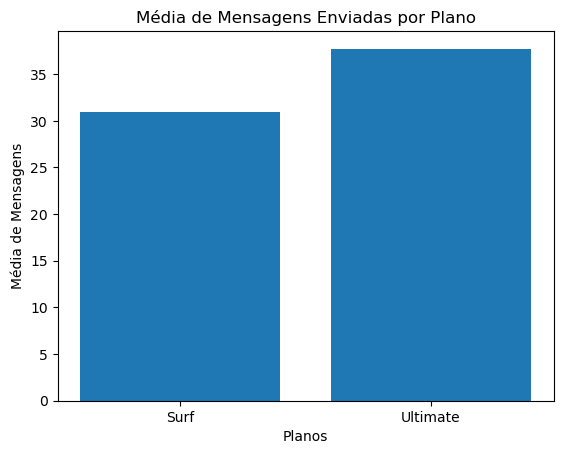

In [85]:
# Definir os dados
media_surf = df_merged[df_merged['plan'] == 'surf']['msg_count'].mean()
media_ultimate = df_merged[df_merged['plan'] == 'ultimate']['msg_count'].mean()

# Calcular a média ponderada
media_ponderada = (media_surf * 0.67) + (media_ultimate * 0.32)

# Criar uma lista com as médias
medias = [media_surf, media_ultimate]

# Definir os rótulos dos planos
planos = ['Surf', 'Ultimate']

# Criar o gráfico de barras
plt.bar(planos, medias)

# Definir os rótulos dos eixos
plt.xlabel('Planos')
plt.ylabel('Média de Mensagens')

# Definir o título do gráfico
plt.title('Média de Mensagens Enviadas por Plano')

# Exibir o gráfico
plt.show()

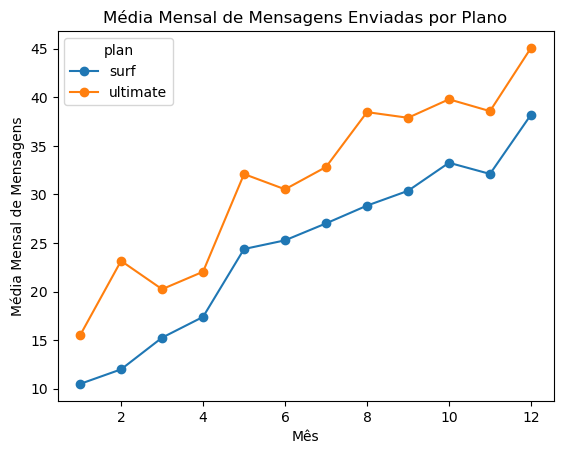

In [86]:
# Agrupar os dados por mês e plano
grouped = df_merged.groupby(['month', 'plan'])

# Calcular a média mensal de mensagens por plano
media_mensal = grouped['msg_count'].mean().unstack()

# Selecionar apenas os planos Surf e Ultimate
media_mensal = media_mensal[['surf', 'ultimate']]

# Plotar o gráfico de linha
media_mensal.plot(kind='line', marker='o')

# Definir os rótulos dos eixos
plt.xlabel('Mês')
plt.ylabel('Média Mensal de Mensagens')

# Definir o título do gráfico
plt.title('Média Mensal de Mensagens Enviadas por Plano')

# Exibir o gráfico
plt.show()

Vizualizando os graficos acima, eu tenho a conclusão de que as pessoas no plano surf utilizam menos mensagens mensais do que o plano ultimate

### Internet

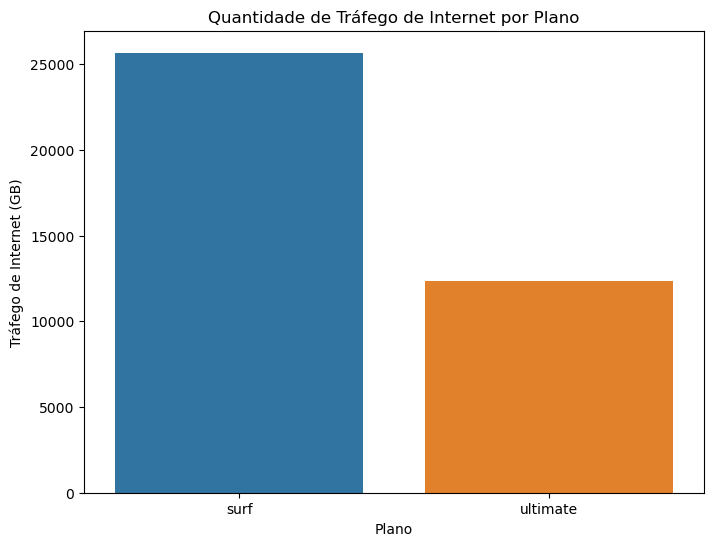

In [87]:
# Agrupar os dados por plano e calcular a soma do tráfego de internet em cada grupo
internet_data = df_merged.groupby('plan')['gb_usage'].sum().reset_index()

# Criar um gráfico de barras usando o Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=internet_data, x='plan', y='gb_usage')

# Configurar os rótulos e título do gráfico
plt.xlabel('Plano')
plt.ylabel('Tráfego de Internet (GB)')
plt.title('Quantidade de Tráfego de Internet por Plano')

# Exibir o gráfico
plt.show()

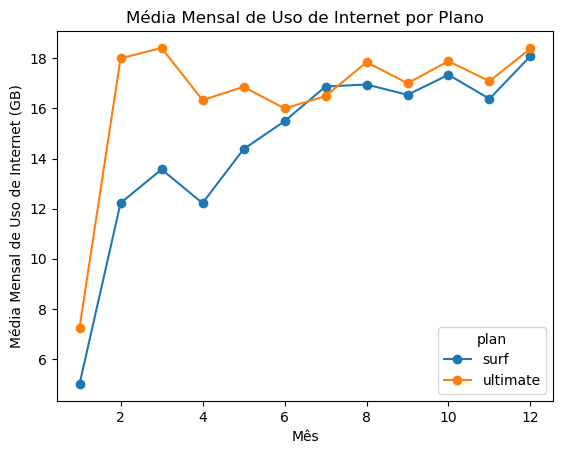

In [88]:
# Agrupar os dados por mês e plano
grouped = df_merged.groupby(['month', 'plan'])

# Calcular a média mensal de uso de internet por plano
media_mensal = grouped['gb_usage'].mean().unstack()

# Selecionar apenas os planos Surf e Ultimate
media_mensal = media_mensal[['surf', 'ultimate']]

# Plotar o gráfico de linha
media_mensal.plot(kind='line', marker='o')

# Definir os rótulos dos eixos
plt.xlabel('Mês')
plt.ylabel('Média Mensal de Uso de Internet (GB)')

# Definir o título do gráfico
plt.title('Média Mensal de Uso de Internet por Plano')

# Exibir o gráfico
plt.show()

Observando o grafico, nós vemos que o uso total de internet no plano surf é superior ao plano ultimate. O que não significa muita coisa, já que a maioria das pessoas usam o plano surf.

É observando o grafico com a média mensal que conseguimos tirar melhores conclusões sobre. Nesse grafico observamos que em média as pessoas no plano ultimate utilizam mais GB por mês do que no plano Surf.

## Receita

[Da mesma forma que você estudou o comportamento do usuário, descreva estatisticamente a receita entre os planos.]

In [89]:
df_merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn,month,...,msg_count,gb_usage,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,payment_amount
0,1000,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,0.0,12,...,11.0,2.0,1000.0,30720.0,3000.0,70.0,7.0,0.01,0.01,70.00
1,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,8,...,30.0,7.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,9,...,44.0,14.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
3,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,10,...,53.0,22.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,90.09
4,1001,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,0.0,11,...,36.0,19.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,Scot,Williamson,51.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,0.0,12,...,0.0,23.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,100.00
2273,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0.0,9,...,0.0,13.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,20.00
2274,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0.0,10,...,0.0,20.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,70.00
2275,1499,Shena,Dickson,37.0,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,0.0,11,...,0.0,17.0,50.0,15360.0,500.0,20.0,10.0,0.03,0.03,40.00


In [90]:
# Filtrar os dados apenas para o plano Surf
df_surf = df_merged[df_merged['plan'] == 'surf']

# Agrupar os dados por mês e calcular a receita total
receita_mensal_surf = df_surf.groupby('month')['payment_amount'].sum()

# Exibir a receita mensal do plano Surf
print(receita_mensal_surf)

month
1        40.00
2       308.34
3      1053.23
4      2022.93
5      3597.49
6      4726.71
7      7489.38
8     10179.43
9     10851.55
10    14944.92
11    15718.83
12    21371.97
Name: payment_amount, dtype: float64


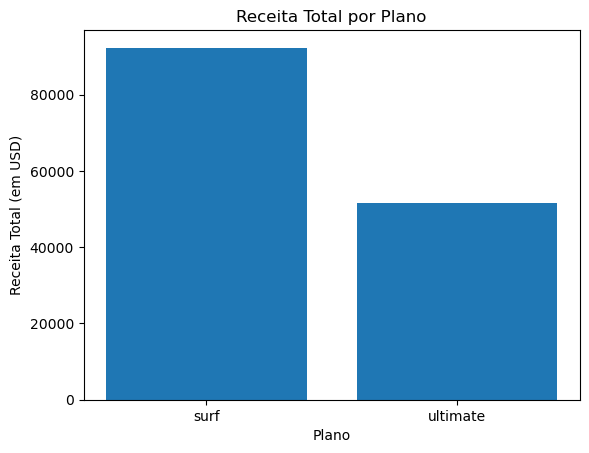

In [91]:
# Agrupar os dados por plano e calcular a receita total
df_revenue = df_merged.groupby('plan')['payment_amount'].sum()

# Plotar o gráfico de barras
plt.bar(df_revenue.index, df_revenue)

# Definir os rótulos dos eixos
plt.xlabel('Plano')
plt.ylabel('Receita Total (em USD)')

# Definir o título do gráfico
plt.title('Receita Total por Plano')

# Exibir o gráfico
plt.show()

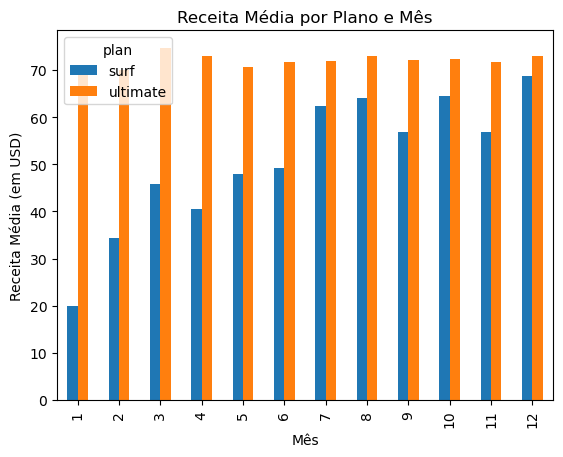

In [92]:

# Agrupar os dados por mês e plano e calcular a média da coluna de pagamento
df_revenue_avg = df_merged.groupby(['month', 'plan'])['payment_amount'].mean().unstack()

# Plotar o gráfico de barras
df_revenue_avg.plot(kind='bar')

# Definir os rótulos dos eixos
plt.xlabel('Mês')
plt.ylabel('Receita Média (em USD)')

# Definir o título do gráfico
plt.title('Receita Média por Plano e Mês')

# Exibir o gráfico
plt.show()

Analisando os gráficos, podemos tirar algumas conclusões:

No geral, o plano Surf gera muito mais receita para a empresa do que o plano Ultimate, devido ao grande número de pessoas que assinam o plano Surf. No entanto, ao observar a receita média mensal por plano, percebemos que o plano Ultimate gera mais receita para a empresa em todos os meses.

Com base nisso, chegamos às seguintes conclusões:

- Para a empresa, é fundamental tentar vender mais planos Ultimate, pois eles geram consistentemente mais receita.
- Para o consumidor, é mais vantajoso assinar o plano Surf, mesmo nos meses em que o limite "gratuito" de uso é excedido, pois ainda é mais econômico do que o plano Ultimate.

## Testar hipóteses estatísticas

In [93]:
# Teste da hipótese de que a receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente.


# Separar as receitas dos planos Ultimate e Surf em duas séries diferentes
revenue_ultimate = df_merged[df_merged['plan'] == 'ultimate']['payment_amount']
revenue_surf = df_merged[df_merged['plan'] == 'surf']['payment_amount']

# Realizar o teste t de Student
t_statistic, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

# Comparar o valor p com o nível de significância
alpha = 0.05
if p_value < alpha:
    print("Rejeitar a hipótese nula - A receita média dos planos Ultimate e Surf é diferente.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula.")

Rejeitar a hipótese nula - A receita média dos planos Ultimate e Surf é diferente.


In [94]:
timestamp1 = pd.Timestamp('2023-06-25')
timedelta = pd.Timedelta(days=3)
timestamp2 = timestamp1 + timedelta

print(timestamp2)  # Resultado: 2023-06-28 00:00:00

2023-06-28 00:00:00


In [95]:
# Filtrando os dados para cada grupo
ny_nj_revenue = df_merged.loc[df_merged['city'].str.contains('NY-NJ'), 'payment_amount']
other_regions_revenue = df_merged.loc[~df_merged['city'].str.contains('NY-NJ'), 'payment_amount']

alpha = 0.05

t_statistic, p_value = ttest_ind(ny_nj_revenue, other_regions_revenue)

if p_value < alpha:
    print("Rejeitar a hipótese nula. A receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A receita média dos usuários da área de NY-NJ não difere da dos usuários das demais regiões.")

Rejeitar a hipótese nula. A receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões.


## Conclusão geral


A minha conclusão final diante do objetivo da análise é a seguinte:

- O plano Surf, considerando o total anual, gera mais receita para a empresa devido à sua base de assinantes, que é significativamente maior em comparação ao plano Ultimate.
- Porém, em termos de receita média mensal, o plano Ultimate supera o plano Surf. Mesmo com um número menor de assinantes, os usuários do plano Ultimate geram uma receita média por mês maior do que os usuários do plano Surf.
- Com base nessas análises, minha recomendação para a equipe de marketing é investir mais na promoção do plano Ultimate, visando aumentar o número de assinantes e, consequentemente, impulsionar a receita anual da empresa.

Essa estratégia de focar no plano Ultimate pode ser benéfica para maximizar a receita, considerando a maior margem de lucro proporcionada por esse plano. No entanto, é importante monitorar o impacto dessa estratégia e avaliar o comportamento do mercado e dos clientes para garantir o sucesso da ação promocional.

